In [1]:
#KRM

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

import matplotlib.cm as cm

from math import *

from mpl_toolkits.mplot3d.axes3d import Axes3D

import scipy.io

import scipy as spy

%matplotlib inline

from netCDF4 import Dataset

import pylab as pl

import os 

import sys

import seaborn as sns



In [2]:
lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 


In [3]:
sns.set()
sns.set_style('white')
sns.set_context('talk')

In [41]:
CanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc'
CanyonGridOut = Dataset(CanyonGrid)

NoCCanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/gridGlob.nc'
NoCCanyonGridOut = Dataset(NoCCanyonGrid)

CanyonState='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/stateGlob.nc'
CanyonStateOut = Dataset(CanyonState)

CanyonPtracers='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/ptracersGlob.nc'
CanyonPtracersOut = Dataset(CanyonPtracers)

In [5]:
nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 

xc = rout.getField(CanyonGrid, 'XC') # x coords tracer cells
yc = rout.getField(CanyonGrid, 'YC') # y coords tracer cells
rc = CanyonGridOut.variables['RC']
bathy = rout.getField(CanyonGrid, 'Depth')

hFacC = rout.getField(CanyonGrid, 'HFacC')
MaskC = rout.getMask(CanyonGrid, 'HFacC')

xcNoC = rout.getField(NoCCanyonGrid, 'XC') # x coords tracer cells
ycNoC = rout.getField(NoCCanyonGrid, 'YC') # y coords tracer cells

bathyNoC = rout.getField(NoCCanyonGrid, 'Depth')

hFacCNoC = rout.getField(NoCCanyonGrid, 'HFacC')
MaskCNoC = rout.getMask(NoCCanyonGrid, 'HFacC')

In [6]:
def vertTracBox(Mask, W,zlim=30,ylim=230):
    mask_expand = np.expand_dims(Mask[zlim,ylim:,:],0)
    mask_expand = mask_expand + np.zeros(W[:,zlim,ylim:,:].shape)

    vert = W[:,zlim,ylim:,:]
    VertTrans= np.ma.masked_array(vert,mask = mask_expand)
    return VertTrans


In [42]:

Temp = rout.getField(CanyonState,'Temp') # 
Tr1 = rout.getField(CanyonPtracers,'Tr1') # 



In [43]:
Tempbase = vertTracBox(MaskC,Temp,zlim=30,ylim=160)
Tr1base = vertTracBox(MaskC,Tr1,zlim=30,ylim=160)

<function matplotlib.pyplot.tight_layout>

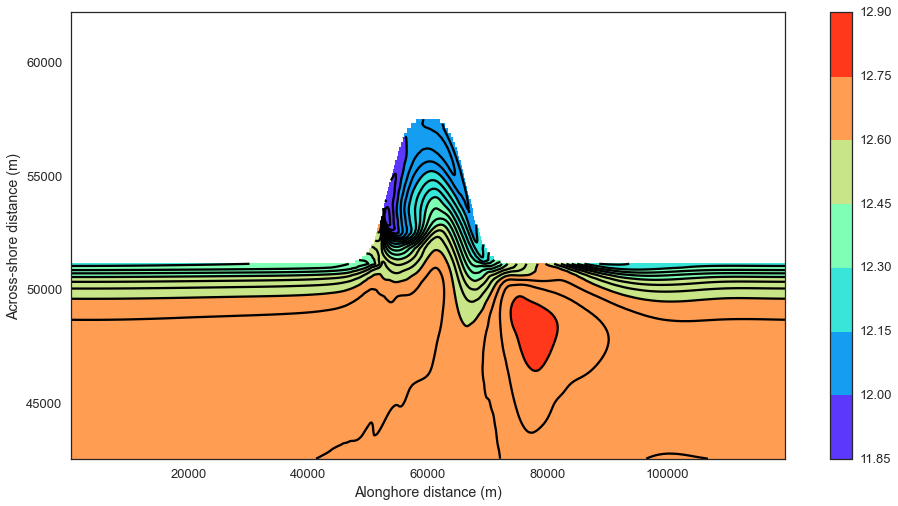

In [20]:
plt.rcParams['contour.negative_linestyle'] = 'solid' # default is to have negative contours with dashed lines
plt.rcParams.update({'font.size':20})


fig = plt.figure(figsize=(16,8))
ax1 =fig.gca()

p = ax1.contourf(xc[160:-80,:],yc[160:-80,:],Tempbase[6,:-80,:],cmap='rainbow')
cb = fig.colorbar(p, shrink=1)

conts = ax1.contour(xc[160:-80,:],yc[160:-80,:],Tempbase[6,:-80,:],20,colors = 'k')

ax1.set_aspect('auto')


plt.ylabel('Across-shore distance (m)')
plt.xlabel('Alonghore distance (m)')
plt.tight_layout

#fig.savefig('/ocean/kramosmu/Figures/VertFluxSurfBaseCase%0d.png' %tt, format='png', dpi=1000, bbox_inches='tight')


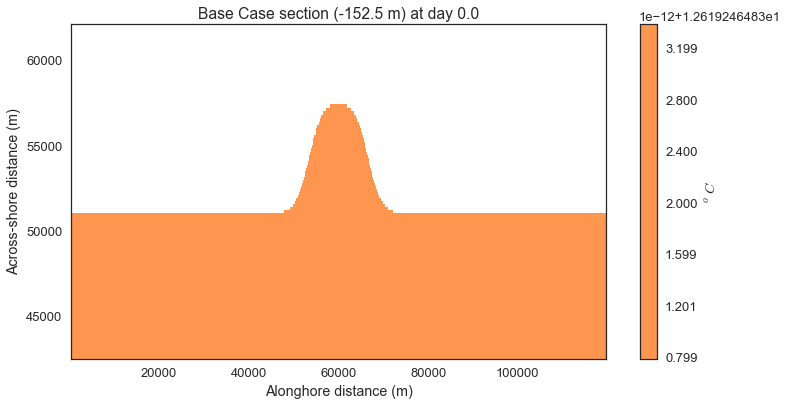

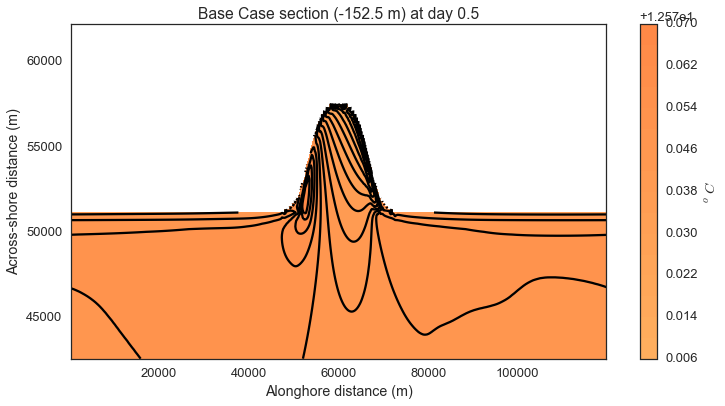

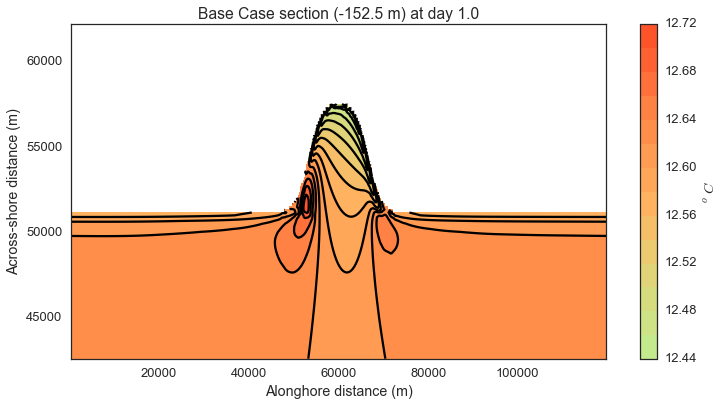

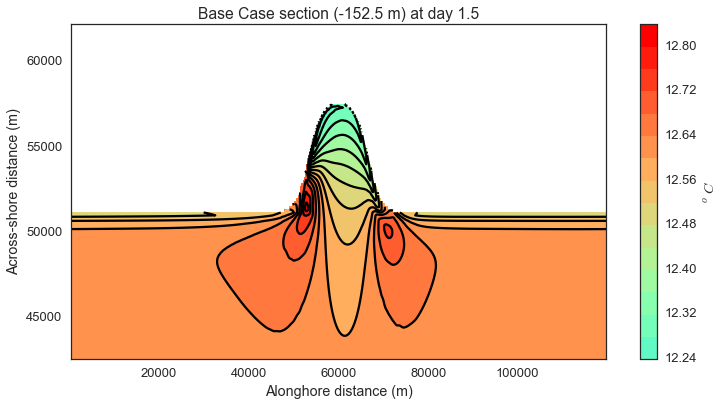

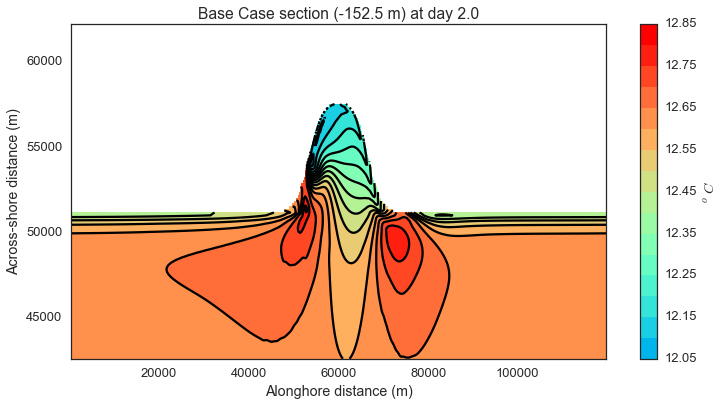

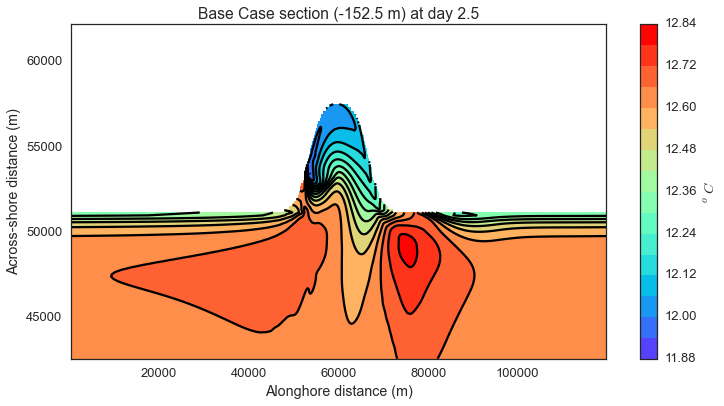

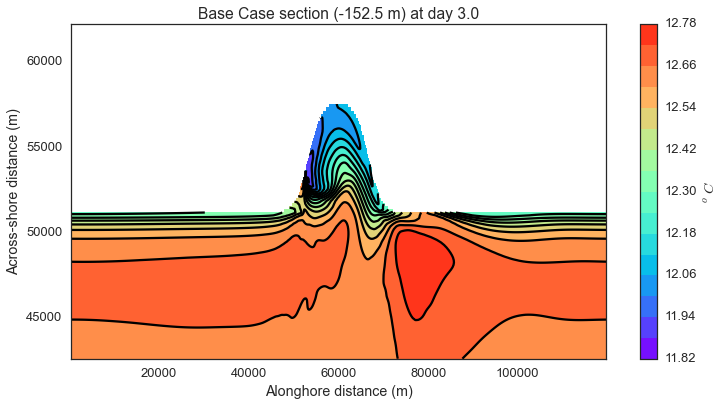

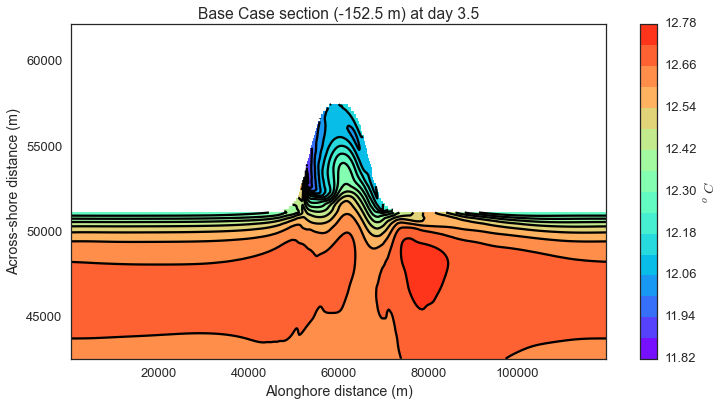

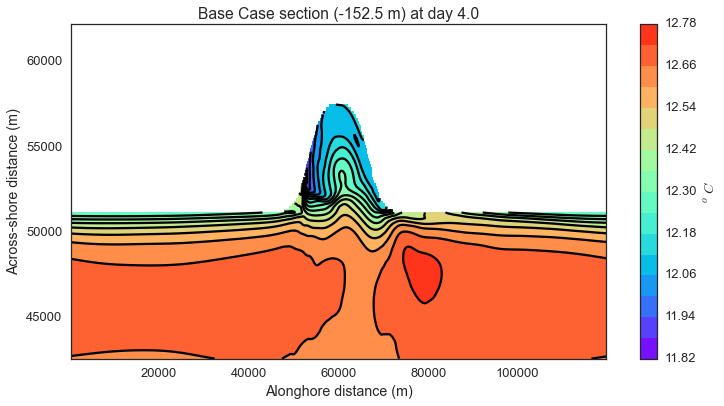

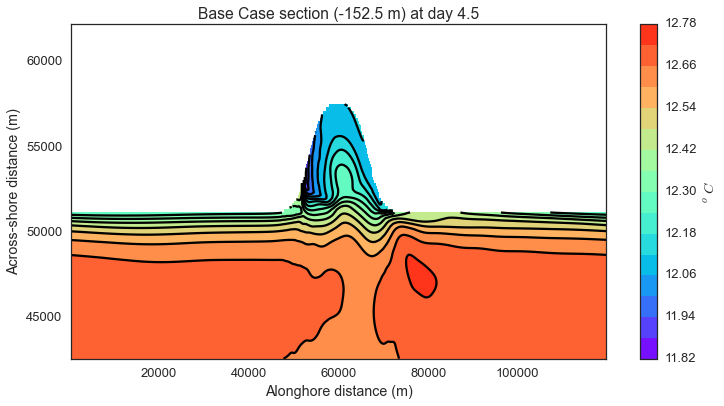

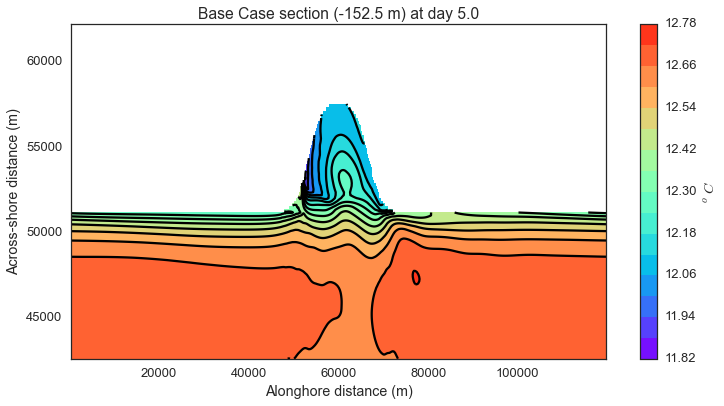

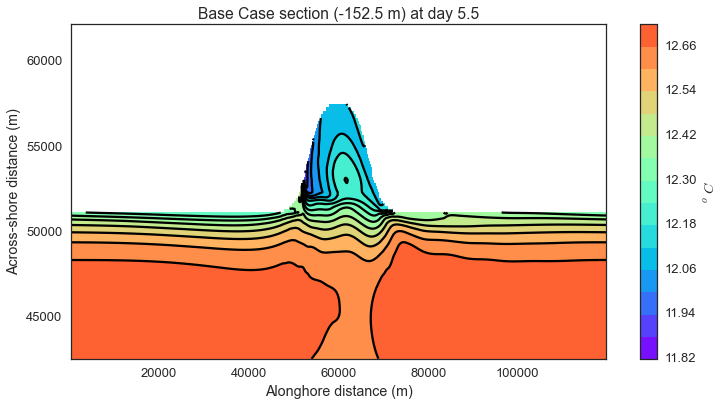

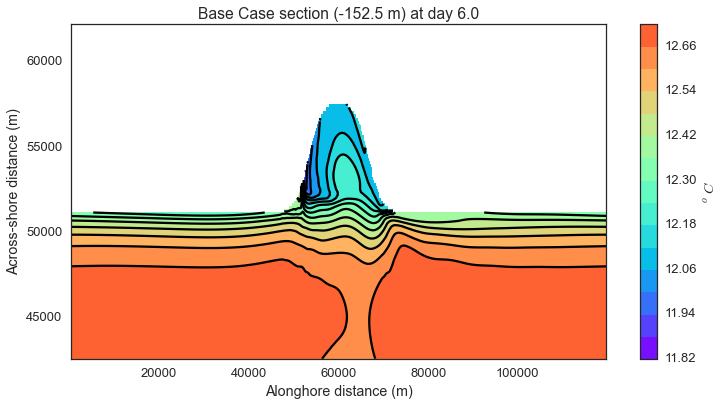

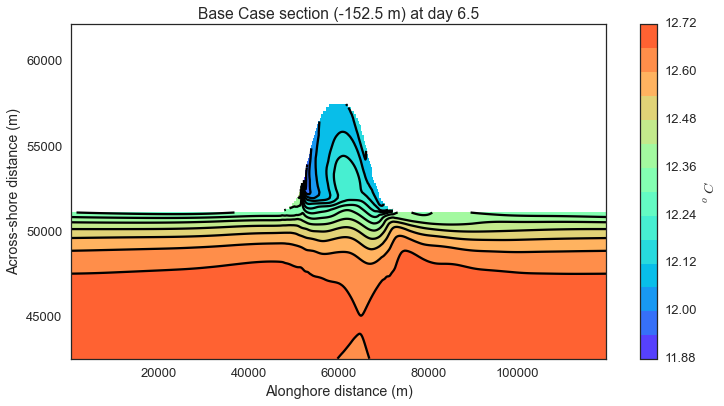

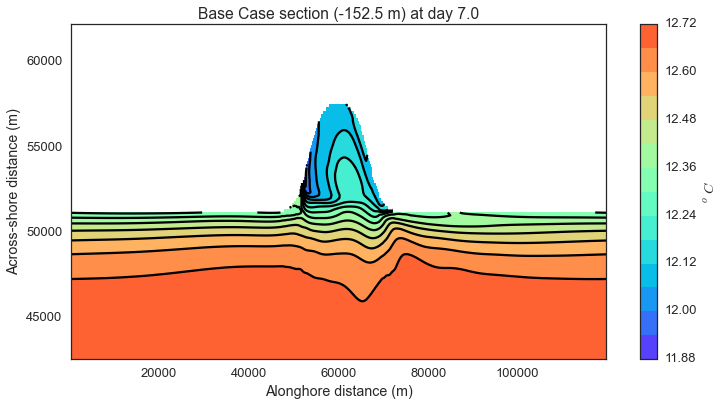

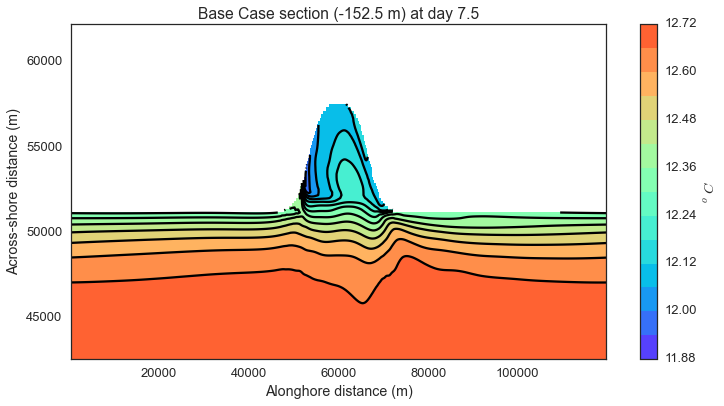

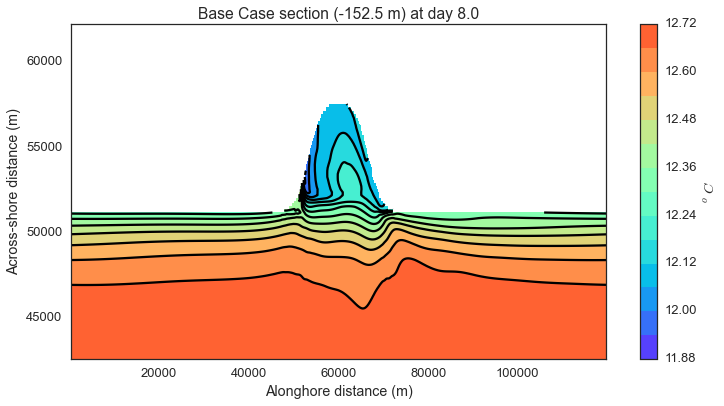

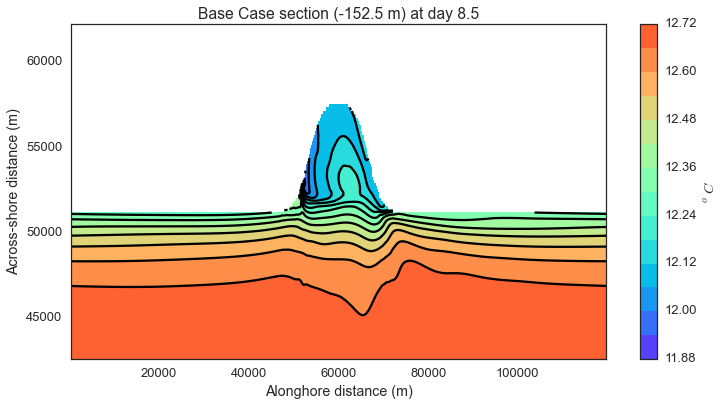

In [39]:
plt.rcParams['contour.negative_linestyle'] = 'solid' # default is to have negative contours with dashed lines
plt.rcParams.update({'font.size':20})

for tt in range(18):
    
    fig = plt.figure(figsize=(12,6))
    ax1 =fig.gca()

    p = ax1.contourf(xc[160:-80,:],yc[160:-80,:],Tempbase[tt,:-80,:],15,vmin=np.min(Tempbase),vmax=np.max(Tempbase),cmap='rainbow')
    cb = fig.colorbar(p, shrink=1)
    cb.set_label('$^oC$')
    conts = ax1.contour(xc[160:-80,:],yc[160:-80,:],Tempbase[tt,:-80,:],15,colors = 'k')

    ax1.set_aspect('auto')

    plt.title('Base Case section (%0.1f m) at day %0.1f' %(rc[30],tt/2.0))
    plt.ylabel('Across-shore distance (m)')
    plt.xlabel('Alonghore distance (m)')
    plt.tight_layout
    plt.show()
#fig.savefig('/ocean/kramosmu/Figures/VertFluxSurfBaseCase%0d.png' %tt, format='png', dpi=1000, bbox_inches='tight')


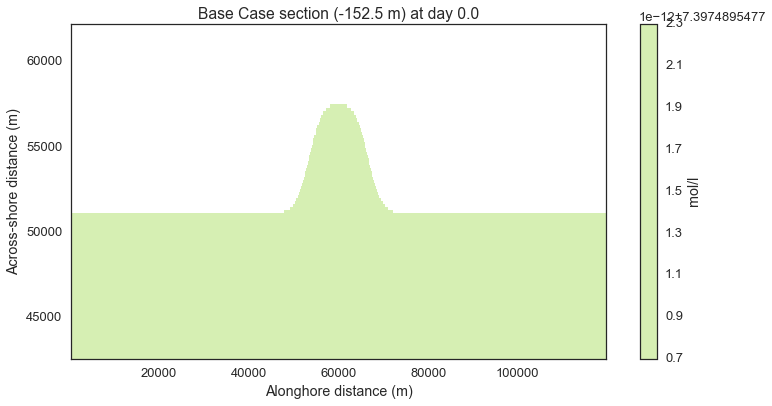

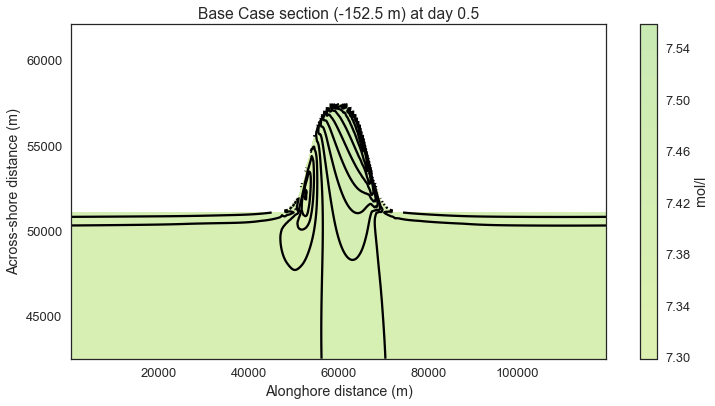

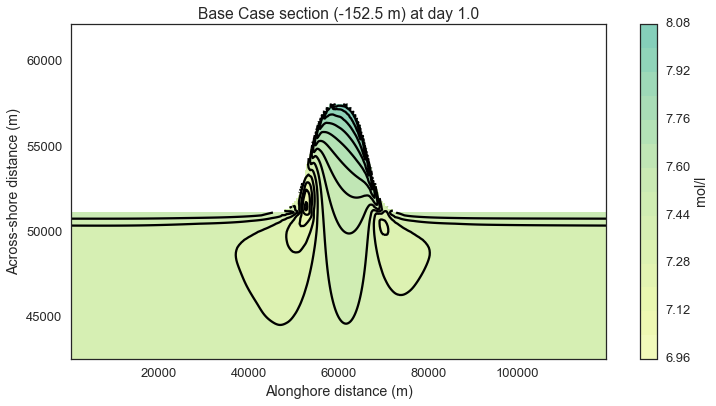

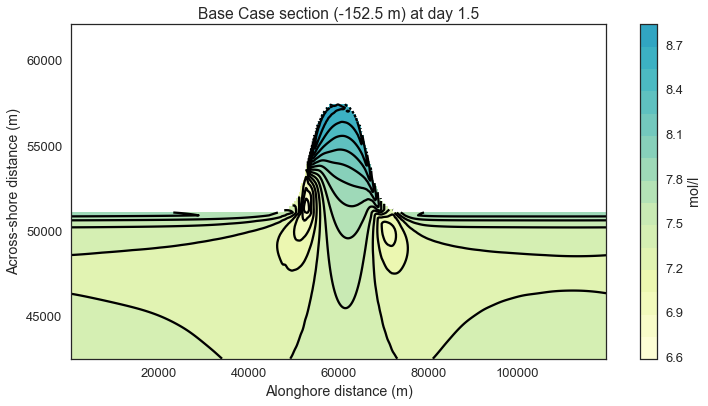

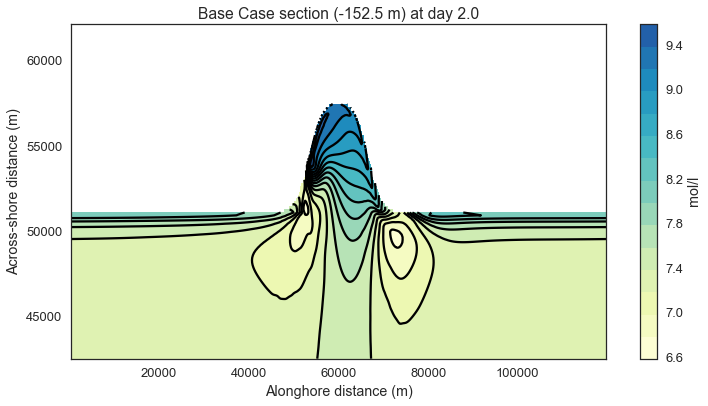

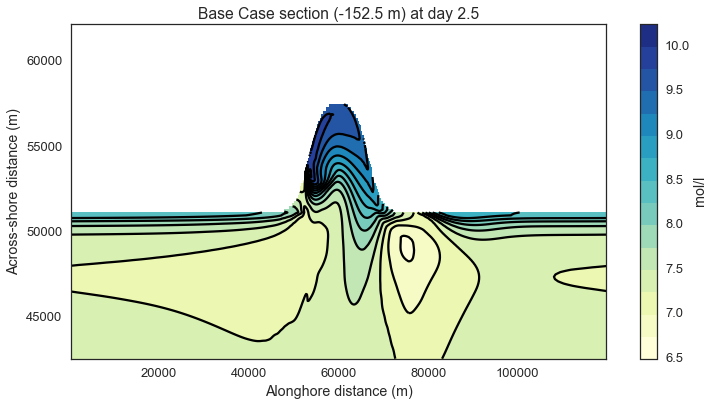

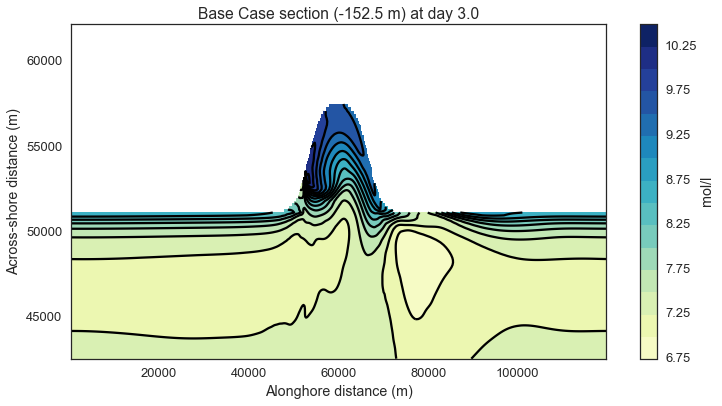

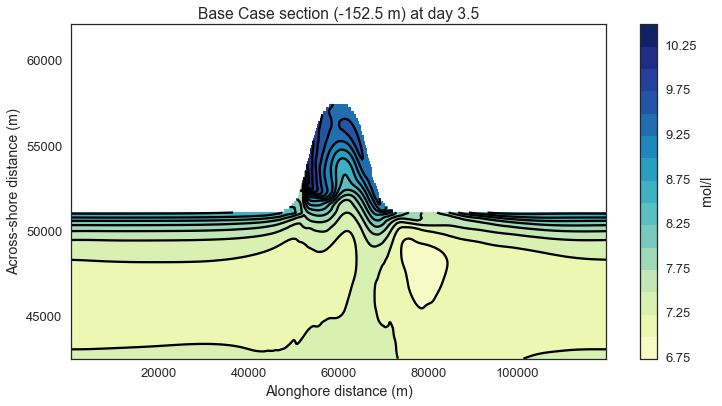

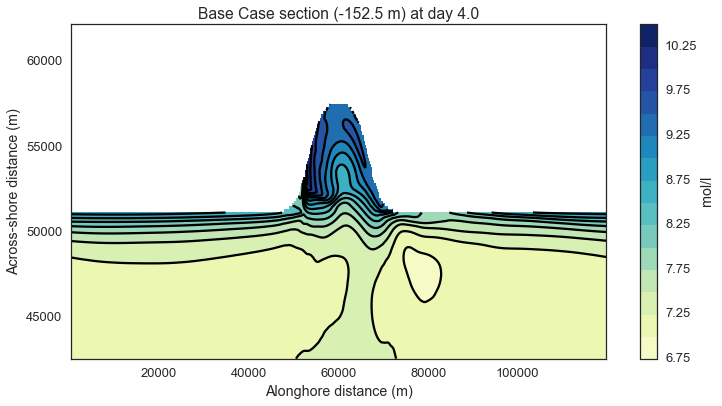

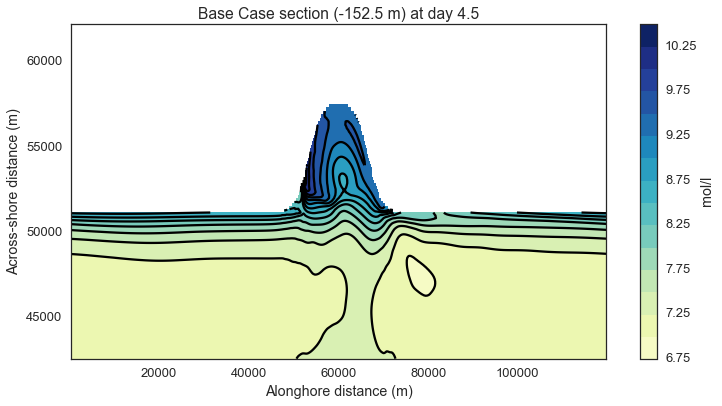

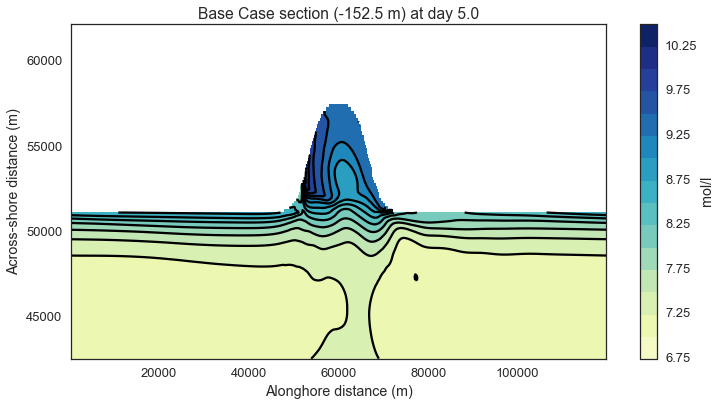

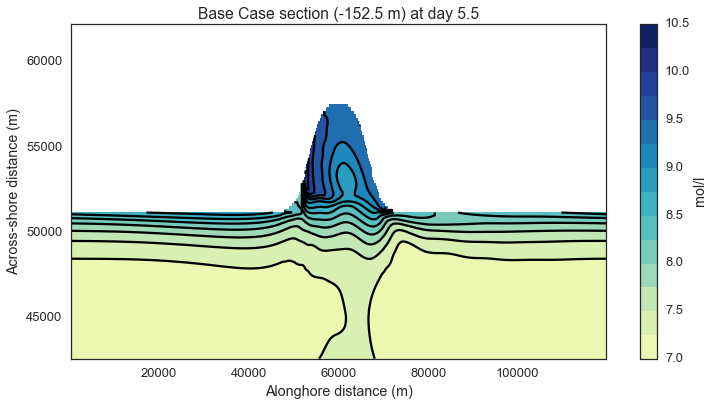

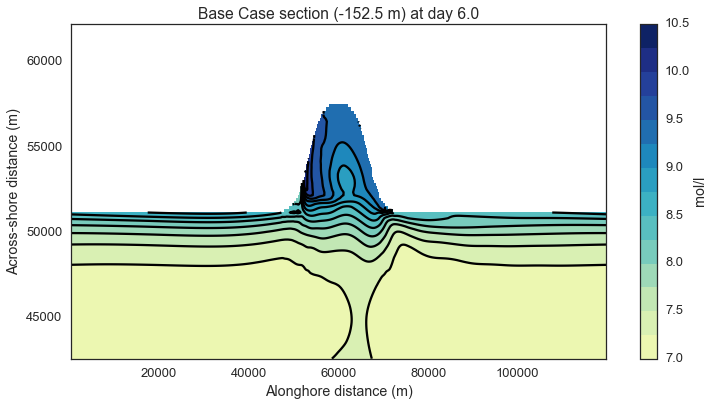

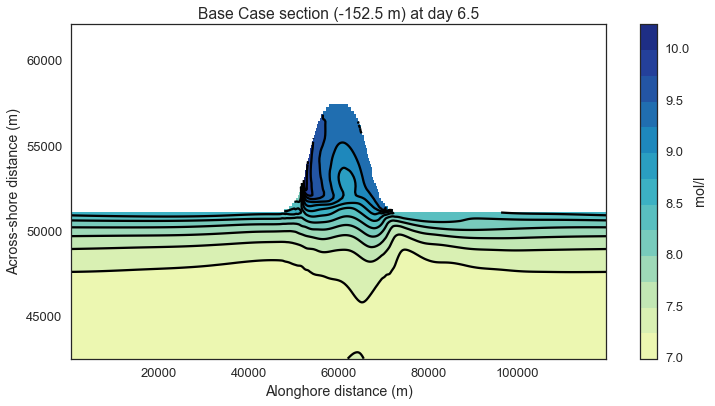

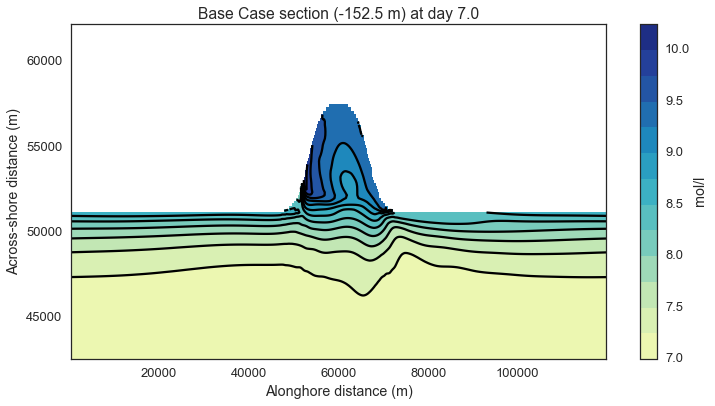

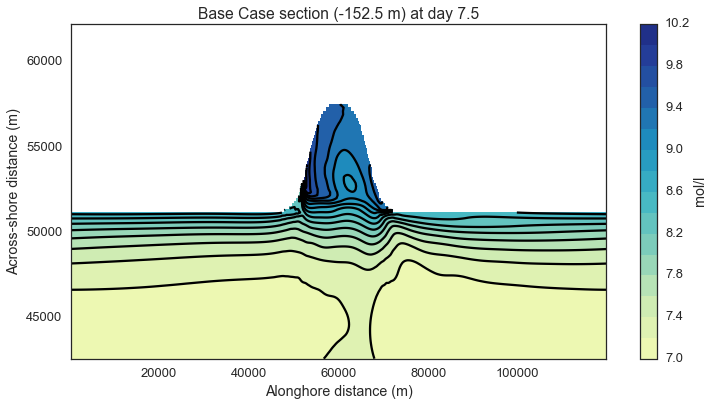

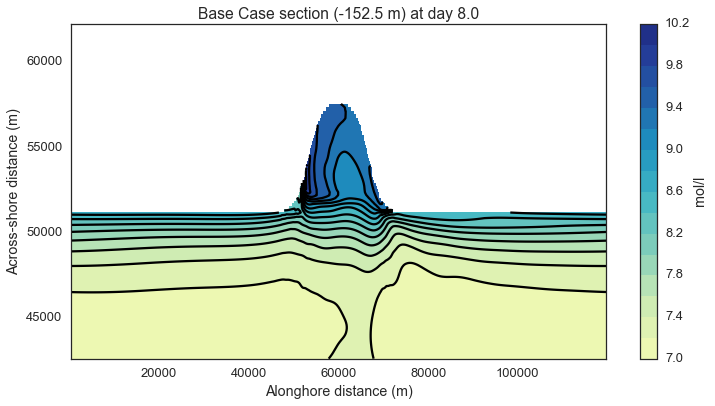

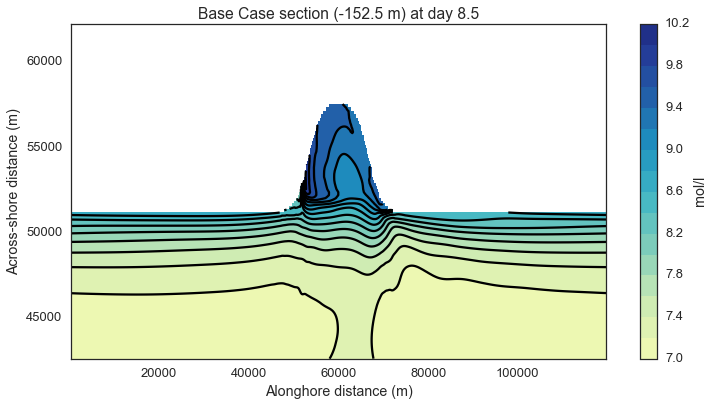

In [44]:
plt.rcParams['contour.negative_linestyle'] = 'solid' # default is to have negative contours with dashed lines
plt.rcParams.update({'font.size':20})

for tt in range(18):
    
    fig = plt.figure(figsize=(12,6))
    ax1 =fig.gca()

    p = ax1.contourf(xc[160:-80,:],yc[160:-80,:],Tr1base[tt,:-80,:],15,vmin=np.min(Tr1base),vmax=np.max(Tr1base),cmap='YlGnBu')
    cb = fig.colorbar(p, shrink=1)
    cb.set_label('mol/l')
    conts = ax1.contour(xc[160:-80,:],yc[160:-80,:],Tr1base[tt,:-80,:],15,colors = 'k')

    ax1.set_aspect('auto')

    plt.title('Base Case section (%0.1f m) at day %0.1f' %(rc[30],tt/2.0))
    plt.ylabel('Across-shore distance (m)')
    plt.xlabel('Alonghore distance (m)')
    plt.tight_layout
    plt.show()
#fig.savefig('/ocean/kramosmu/Figures/VertFluxSurfBaseCase%0d.png' %tt, format='png', dpi=1000, bbox_inches='tight')
